In [1]:
import scipy.stats as st
import statsmodels.api as sm
import numpy as np

import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from math import sqrt

# Exploring Data Set

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [5]:
df.columns = ['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'is_active_member', 'estimated_salary', 'exited']
df.columns

Index(['row_number', 'customer_id', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_crcard',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   creditscore       10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            10000 non-null  int64  
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_crcard        10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
row_number,10000.0,NaN,NaN,NaN,5000.5,2886.89568,1.0,2500.75,5000.5,7500.25,10000.0
customer_id,10000.0,NaN,NaN,NaN,15690940.5694,71936.186123,15565701.0,15628528.25,15690738.0,15753233.75,15815690.0
surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
creditscore,10000.0,NaN,NaN,NaN,650.5288,96.653299,350.0,584.0,652.0,718.0,850.0
geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,10000.0,NaN,NaN,NaN,38.9218,10.487806,18.0,32.0,37.0,44.0,92.0
tenure,10000.0,NaN,NaN,NaN,5.0128,2.892174,0.0,3.0,5.0,7.0,10.0
balance,10000.0,NaN,NaN,NaN,76485.889288,62397.405202,0.0,0.0,97198.54,127644.24,250898.09
num_of_products,10000.0,NaN,NaN,NaN,1.5302,0.581654,1.0,1.0,1.0,2.0,4.0


In [8]:
df['exited'].value_counts().to_frame()

,exited
0,7963
1,2037


In [9]:
print('Percentage of positive marks: {:.1%}'.format(df['exited'].mean()))

Percentage of positive marks: 20.4%


In [10]:
df.duplicated().sum()

0

# Меры центральной тенденции

In [11]:
not_null_balance = df[df['balance'] != 0]['balance']

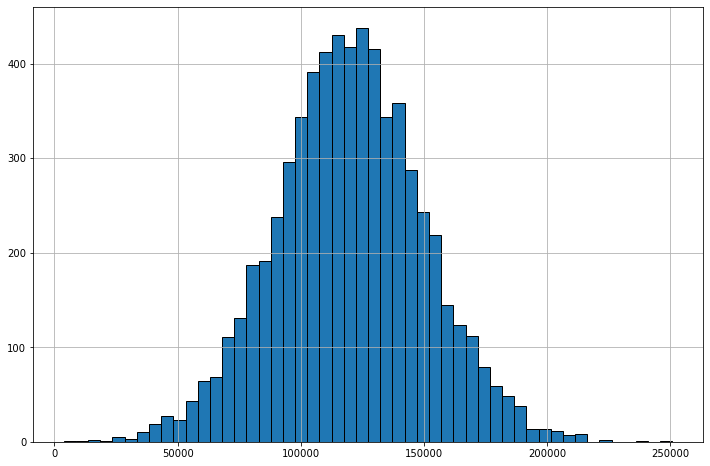

In [12]:
not_null_balance.hist(
    bins=50, 
    figsize=(12,8), 
    edgecolor='black'
);

### Среднее значение

In [13]:
not_null_balance.mean()

119827.49379288674

### Медиана

In [14]:
not_null_balance.median()

119839.69

### Мода

In [15]:
not_null_balance.mode()

0    105473.74
1    130170.82
dtype: float64

# Меры изменчивости

### Размах

In [16]:
print("min: ", np.nanmin(not_null_balance))
print("max: ", np.nanmax(not_null_balance))
print("размах: ", np.ptp(not_null_balance))

min:  3768.69
max:  250898.09
размах:  247129.4


### Дисперсия

Диспе́рсия случа́йной величины́ — мера разброса значений случайной величины относительно её математического ожидания.

#### Для генеральной совокупности

In [17]:
np.var(not_null_balance)

905570528.9801762

#### Для выборки (уменьшаем кол-во степеней свободы на 1)

In [18]:
np.var(not_null_balance, ddof=1)

905712423.4535357

### Стандартное отклонение

Среднеквадрати́ческое отклоне́ние — показатель рассеивания значений случайной величины относительно её математического ожидания. Обычно он означает квадратный корень из дисперсии случайной величины.
В статистике принято два обозначения: sigma — для генеральной совокупности и sd (с англ. standard deviation — стандартное отклонение) — для выборки.

#### Для генеральной совокупности

In [19]:
np.std(not_null_balance)

30092.69893147134

#### Для выборки (уменьшаем кол-во степеней свободы на 1)

In [20]:
np.std(not_null_balance, ddof=1)

30095.05646204266

# Квартили распределения и график box-plot

In [21]:
# Первый квартиль
print(np.quantile(not_null_balance, 0.25))
# Второй квартиль
print(np.quantile(not_null_balance, 0.50))
# Третий квартиль
print(np.quantile(not_null_balance, 0.75))

100181.975
119839.69
139512.29


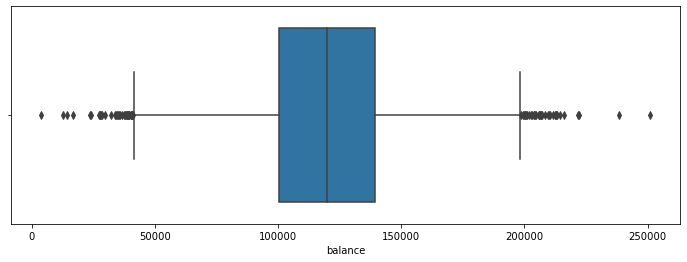

In [22]:
plt.figure(figsize=(12,4))
sns.boxplot(x=not_null_balance);

# Нормальное распределение

### Стандартизация

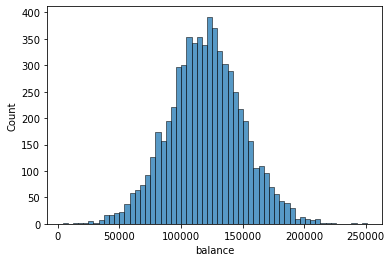

In [23]:
sns.histplot(x=not_null_balance);

In [24]:
not_null_balance_z_st = st.zscore(not_null_balance)

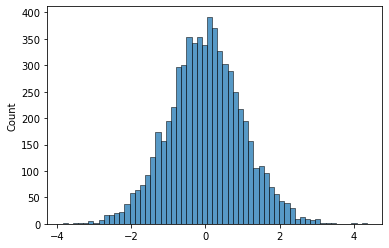

In [25]:
sns.histplot(x=not_null_balance_z_st);

In [26]:
def calc_proba(data, value):
    '''
    Какой процент наблюдений в data превосходит значение value
    '''
    mean = np.mean(data)
    std = np.std(data, ddof=1)
    z = (value - mean) / std
    proba = 1 - st.norm.cdf(z)
    return proba

In [27]:
calc_proba(not_null_balance, np.mean(not_null_balance))

0.5

### Доверительный интервал 

In [28]:
def calc_confidence_interval(sample, sigma_value=2):
    '''
    Расчитывает доверительный интервал для среднего значения у генеральной совокупности 
    по выборке с заданной точностью (sigma_value)
    '''
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    se = sample_std / sqrt(len(sample))
    l_inter = sample_mean - sigma_value * se
    r_inter = sample_mean + sigma_value * se
    return l_inter, r_inter

In [29]:
left_interval, right_interval = calc_confidence_interval(not_null_balance.sample(1000))
print(not_null_balance.mean())
print(left_interval)
print(right_interval)

119827.49379288674
118394.61477801797
122192.21324198216


### P-value

In [30]:
M = 20
n = 64
m = 18.5
sd = 4

In [31]:
def calc_p_value1(M1, n2, m2, sd2):
    '''
    Для задачи
    https://stepik.org/lesson/8078/step/3?unit=1358
    
    M1 - среднее значение 1-ой выборки
    
    n2 - размер 2-ой выборки
    m2 - среднее значение 2-ой выборки
    sd2 - стандартное отклонение 2-ой выборки
    '''
    se2 = sd2/sqrt(n2) # расчет стандартной ошибки среднего для 2-ой выборки (проверяемая, новая)
    z2 = (m2-M1)/se2 # Z-преобразование
    print(z2)
    return st.norm.sf(abs(z2))*2

In [32]:
calc_p_value1(M, n, m, sd)

-3.0


0.0026997960632601866

# Проверка распределения на нормальность

### QQ-plot

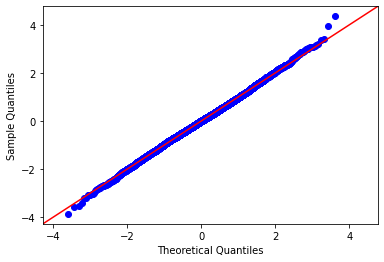

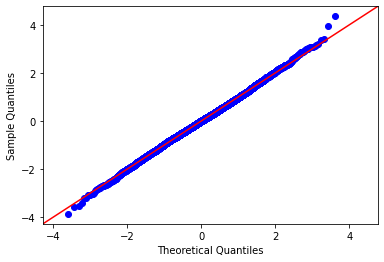

In [33]:
sm.qqplot(not_null_balance_z_st, line='45')

### Тест Шапиро-Уилка

<AxesSubplot:>

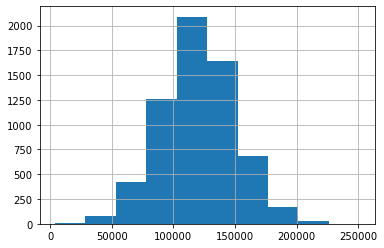

In [34]:
not_null_balance.hist()

In [35]:
not_null_balance_100sapmple = not_null_balance.sample(100)

<AxesSubplot:>

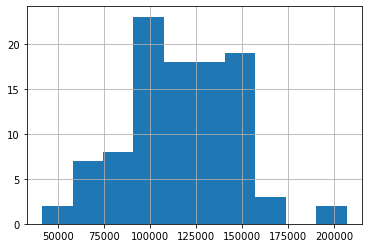

In [36]:
not_null_balance_100sapmple.hist()

In [37]:
st.shapiro(not_null_balance_100sapmple)

ShapiroResult(statistic=0.9843605756759644, pvalue=0.28534090518951416)

In [38]:
from random import randrange

In [39]:
def coin_flip(N, n):
    chi2 = []
    for _ in range(0,N):
        experiment = []
        for _ in range(0,n):
            experiment.append(randrange(2))
        # print('experiment: ', experiment)
        # print('len: ', len(experiment))
        # print('sum: ', sum(experiment))
        # пересчет формулы !
        chi2_experiment = ((sum(experiment)-n/2)**2+(n-sum(experiment)-n/2)**2)/(n/2)
        # print(sum(experiment), n-sum(experiment))
        # print('chi2_experiment: ', chi2_experiment)
        chi2.append(chi2_experiment)
    # print('chi2: ', chi2)
    return chi2

In [40]:
coin_flip_chi2 = coin_flip(1000, 60)

<AxesSubplot:>

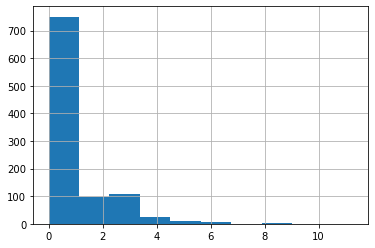

In [41]:
pd.Series(coin_flip_chi2).hist()

# Research of task

### Remove unnecessary features 

In [42]:
data = df.drop(['row_number', 'customer_id', 'surname'], axis=1).copy()
data.head()

,creditscore,geography,gender,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### One-hot Encoding

In [43]:
# OHE of features
gender_ohe = pd.get_dummies(df["gender"], drop_first=True)
country_ohe = pd.get_dummies(df["geography"], drop_first=True)

# delete catfeatures
data.drop(["gender", "geography"], axis=1, inplace=True)

#concat new sets
df_ohe = pd.concat([data, gender_ohe, country_ohe], axis=1)

df_ohe.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,exited,Male,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [44]:
df_ohe.columns = df_ohe.columns.str.lower()
df_ohe.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'num_of_products',
       'has_crcard', 'is_active_member', 'estimated_salary', 'exited', 'male',
       'germany', 'spain'],
      dtype='object')

In [45]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   creditscore       10000 non-null  int64  
 1   age               10000 non-null  int64  
 2   tenure            10000 non-null  int64  
 3   balance           10000 non-null  float64
 4   num_of_products   10000 non-null  int64  
 5   has_crcard        10000 non-null  int64  
 6   is_active_member  10000 non-null  int64  
 7   estimated_salary  10000 non-null  float64
 8   exited            10000 non-null  int64  
 9   male              10000 non-null  uint8  
 10  germany           10000 non-null  uint8  
 11  spain             10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


### Split data set

We have prepared features. Now we will divide our samples into training, validation for the selection of hyperparameters and test, on which we will test our model. We will not touch the test sample to the end, we will work out the best model on it

In [46]:
def split_data(data, target_column):
    return data.drop(columns=[target_column], axis=1), data[target_column]

In [47]:
features, target = split_data(df_ohe,'exited')

We get a validation sample of 20% and divide the remaining 80% again to obtain a test sample. We will conduct training on 60% of the data

In [48]:
features_df, features_valid, target_df, target_valid = ( 
                                train_test_split(
                                features, target, test_size=0.20, random_state=42)
)

In [49]:
features_train, features_test, target_train, target_test = ( 
                                train_test_split(
                                features_df, target_df, test_size=0.25, random_state=42)
)

In [50]:
print('Objects of train:', len(features_train))
print('Objects of valid:', len(features_valid))
print('Objects of test:', len(features_test))
print('Sum of objects:', len(features_train) + len(features_test) + len(features_test))
print()
print('Objects of original set (check sum):', len(df_ohe))

Objects of train: 6000
Objects of valid: 2000
Objects of test: 2000
Sum of objects: 10000

Objects of original set (check sum): 10000


### Scaling

In [51]:
features_train.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,male,germany,spain
8588,712,29,7,77919.78,1,1,0,122547.58,0,0,1
3178,542,39,4,109949.39,2,1,1,41268.65,0,0,0
5200,512,42,9,93955.83,2,1,0,14828.54,1,1,0
8889,580,39,9,128362.59,1,1,0,86044.98,0,0,0
5789,689,55,1,76296.81,1,1,0,42364.75,0,1,0


In [52]:
numeric = ['creditscore', 'age', 'balance', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
pd.options.mode.chained_assignment = None
features_train[numeric] = scaler.transform(features_train[numeric])
features_train.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,male,germany,spain
8588,0.626553,-0.948125,7,0.026803,1,1,0,0.389943,0,0,1
3178,-1.143262,0.006684,4,0.538874,2,1,1,-1.026089,0,0,0
5200,-1.455583,0.293126,9,0.283178,2,1,0,-1.486725,1,1,0
8889,-0.747657,0.006684,9,0.833254,1,1,0,-0.246001,0,0,0
5789,0.387107,1.534377,1,0.000856,1,1,0,-1.006993,0,1,0


In [53]:
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_valid.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,male,germany,spain
6252,-0.581086,-0.661682,3,0.327195,2,0,0,-1.017034,1,1,0
4684,-0.299998,0.388607,1,-1.218934,2,1,1,0.805136,1,0,0
1731,-0.529032,0.484088,4,-1.218934,2,1,0,-0.724818,0,0,1
4742,-1.518047,1.916301,8,0.686002,2,1,1,1.228495,1,1,0
4521,-0.955870,-1.139087,7,0.779430,1,1,1,0.252697,0,0,1


In [54]:
features_test[numeric] = scaler.transform(features_test[numeric])
features_test.head()

,creditscore,age,tenure,balance,num_of_products,has_crcard,is_active_member,estimated_salary,male,germany,spain
3188,1.553103,-0.661682,4,-0.017150,1,1,1,-1.084803,0,0,0
8293,1.188729,-1.043606,4,0.231074,1,0,1,-1.368802,0,1,0
1710,1.834191,-1.043606,8,0.935642,1,1,0,-0.362538,1,0,1
7510,1.521871,-0.279759,1,-1.218934,2,1,1,1.025781,1,0,0
1461,-0.424926,-0.470721,4,-1.218934,2,1,0,1.233214,1,0,1


### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
clf = DecisionTreeClassifier(random_state=42)

In [57]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9, 10, 11, 12],
              'min_samples_split' : [10, 11, 12, 13, 14, 15],
              'min_samples_leaf' : [1, 2, 3, 4],
              'class_weight': ['balanced', None],
              'criterion' :['gini', 'entropy']
             }

In [58]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')

In [59]:
grid_search.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'class_weight': ['balanced', None],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [10, 11, 12, 13, 14, 15]},
             scoring='f1')

In [60]:
grid_search.best_params_

{'ccp_alpha': 0.001,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 10}

In [61]:
best_clf = grid_search.best_estimator_

In [62]:
best_clf.score(features_valid, target_valid)

0.7565

In [63]:
predicted_valid = best_clf.predict(features_valid)

In [64]:
predicted_valid_prob = best_clf.predict_proba(features_valid)

<AxesSubplot:>

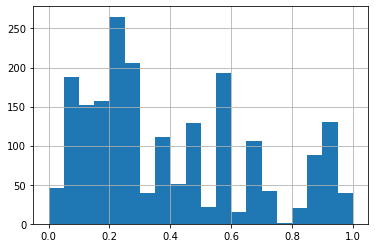

In [65]:
pd.Series(predicted_valid_prob[:,1]).hist(bins=20)

In [66]:
predicted_valid = np.where(predicted_valid_prob[:,1] > 0.65, 1, 0)

In [67]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, precision_score, recall_score, confusion_matrix

In [68]:
conf_mat = confusion_matrix(target_valid, predicted_valid)
conf_mat = pd.DataFrame(conf_mat, index=best_clf.classes_, columns=best_clf.classes_)
conf_mat

,0,1
0,1421,186
1,153,240


In [69]:
f1_score(target_valid, predicted_valid)

0.5860805860805861

In [70]:
precision_score(target_valid, predicted_valid)

0.5633802816901409

In [71]:
recall_score(target_valid, predicted_valid)

0.6106870229007634

In [72]:
roc_auc_score(target_valid, predicted_valid)

0.7474717006227526

In [73]:
fpr, tpr, threshold = roc_curve(target_valid, predicted_valid_prob[:,1])
roc_auc = auc(fpr, tpr)

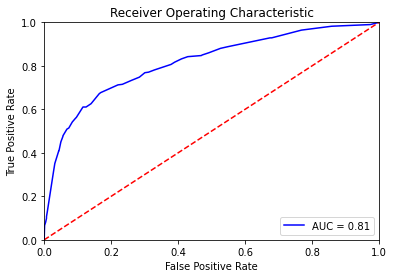

In [74]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
clf = RandomForestClassifier(random_state=42)

In [77]:
param_grid = {'n_estimators': [100],
              'max_features': ['auto'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [12, 15, 20],
              'min_samples_split' : [2, 3],
              'min_samples_leaf' : [3, 4, 5],
              'class_weight': ['balanced'],
              'criterion' :['gini', 'entropy']
             }

In [78]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='f1')

In [79]:
grid_search.fit(features_train, target_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [12, 15, 20], 'max_features': ['auto'],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [2, 3], 'n_estimators': [100]},
             scoring='f1')

In [80]:
grid_search.best_params_

{'ccp_alpha': 0.001,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [81]:
grid_search_dict = {'ccp_alpha': 0.001,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [82]:
grid_search_dict

{'ccp_alpha': 0.001,
 'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 12,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [83]:
best_clf = grid_search.best_estimator_

In [84]:
best_clf.score(features_train, target_train)

0.8986666666666666

In [85]:
best_clf.score(features_valid, target_valid)

0.837

In [86]:
predicted_valid_prob = best_clf.predict_proba(features_valid)

<AxesSubplot:>

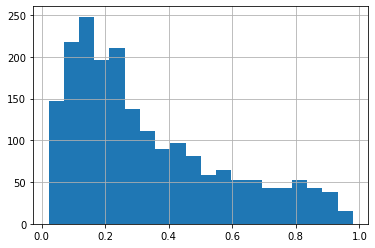

In [92]:
pd.Series(predicted_valid_prob[:,1]).hist(bins=20)

In [88]:
probabilities_one_valid = predicted_valid_prob[:,1]

In [89]:
for threshold in np.arange(0, 0.95, 0.05):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    print("Threshold = {:.2f} | Precision = {:.3f}, Recall = {:.3f} | F1-score = {:.3f}".format(
        threshold, precision, recall, f1))

Threshold = 0.00 | Precision = 0.197, Recall = 1.000 | F1-score = 0.328
Threshold = 0.05 | Precision = 0.202, Recall = 0.997 | F1-score = 0.336
Threshold = 0.10 | Precision = 0.225, Recall = 0.987 | F1-score = 0.367
Threshold = 0.15 | Precision = 0.261, Recall = 0.977 | F1-score = 0.412
Threshold = 0.20 | Precision = 0.296, Recall = 0.936 | F1-score = 0.450
Threshold = 0.25 | Precision = 0.348, Recall = 0.896 | F1-score = 0.501
Threshold = 0.30 | Precision = 0.386, Recall = 0.845 | F1-score = 0.530
Threshold = 0.35 | Precision = 0.433, Recall = 0.819 | F1-score = 0.566
Threshold = 0.40 | Precision = 0.472, Recall = 0.784 | F1-score = 0.589
Threshold = 0.45 | Precision = 0.528, Recall = 0.738 | F1-score = 0.616
Threshold = 0.50 | Precision = 0.572, Recall = 0.677 | F1-score = 0.620
Threshold = 0.55 | Precision = 0.611, Recall = 0.628 | F1-score = 0.620
Threshold = 0.60 | Precision = 0.670, Recall = 0.573 | F1-score = 0.617
Threshold = 0.65 | Precision = 0.726, Recall = 0.511 | F1-score 

In [90]:
fpr, tpr, threshold = roc_curve(target_valid, probabilities_one_valid)
roc_auc = auc(fpr, tpr)

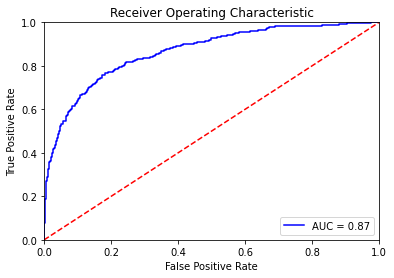

In [91]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Testing Models

In [93]:
predictions_test_prob = best_clf.predict_proba(features_test)

In [94]:
predictions_test = np.where(predictions_test_prob[:,1] > 0.55, 1, 0)

In [95]:
f1_score(target_test, predictions_test)

0.6339066339066338

In [96]:
precision_score(target_test, predictions_test)

0.6433915211970075

In [97]:
recall_score(target_test, predictions_test)

0.6246973365617433

In [98]:
best_clf.feature_importances_

array([0.09537163, 0.30793826, 0.05146426, 0.12212922, 0.19897034,
       0.01132626, 0.04747332, 0.09201307, 0.02166116, 0.04196326,
       0.00968922])

In [99]:
features_test.columns

Index(['creditscore', 'age', 'tenure', 'balance', 'num_of_products',
       'has_crcard', 'is_active_member', 'estimated_salary', 'male', 'germany',
       'spain'],
      dtype='object')

In [105]:
fi = pd.DataFrame({'name':features_test.columns,'fi':best_clf.feature_importances_})
fi.sort_values('fi',ascending=False).reset_index(drop=True)

,name,fi
0,age,0.307938
1,num_of_products,0.198970
2,balance,0.122129
3,creditscore,0.095372
4,estimated_salary,0.092013
5,tenure,0.051464
6,is_active_member,0.047473
7,germany,0.041963
8,male,0.021661
9,has_crcard,0.011326
